In [94]:
import warnings
warnings.filterwarnings ('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [95]:
df_train=pd.read_csv('C:/Users/HP/Downloads/train_LZdllcl.csv')
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [96]:
test=pd.read_csv('C:/Users/HP/Downloads/test_2umaH9m.csv')
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [97]:
df_train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [98]:
df_train['education'].fillna(df_train['education'].mode()[0],inplace=True)
df_train['previous_year_rating'].fillna(df_train['previous_year_rating'].mean(),inplace=True)

In [99]:
df_train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Univariate Analysis

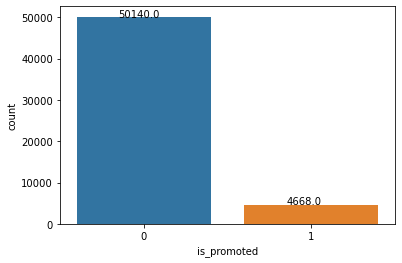

In [104]:
cn=sns.countplot(x='is_promoted',data=df_train)

for i in cn.patches:
   cn.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))


<AxesSubplot:xlabel='education', ylabel='count'>

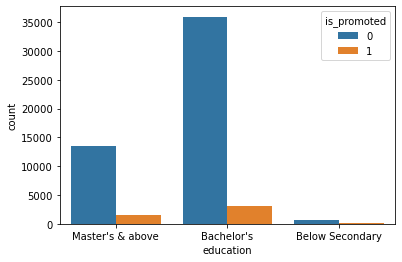

In [105]:
sns.countplot(df_train['education'],hue=df_train['is_promoted'])

<AxesSubplot:xlabel='length_of_service', ylabel='count'>

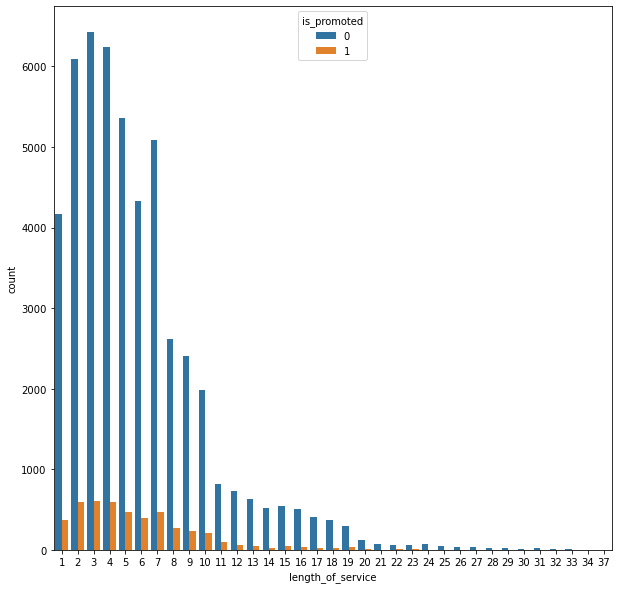

In [106]:
plt.figure(figsize=(10,10))
sns.countplot(df_train['length_of_service'],hue=df_train['is_promoted'])

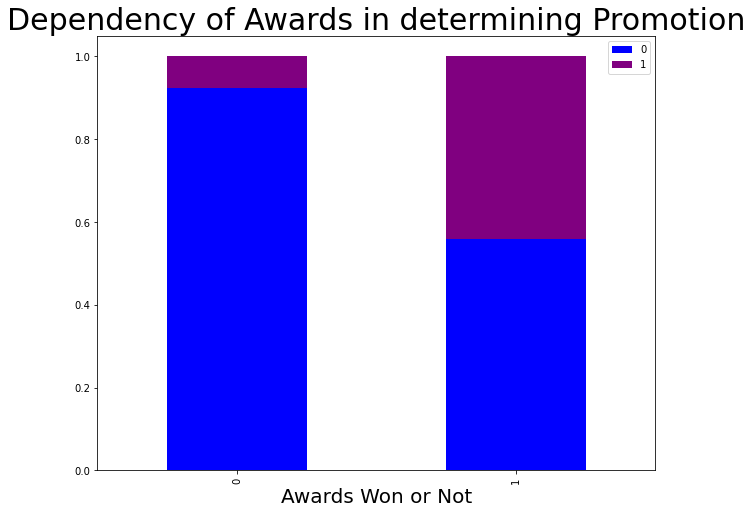

In [107]:
# dependency of awards won on promotion
data = pd.crosstab(df_train['awards_won?'], df_train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['blue', 'purple'])
plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

In [108]:
# Checking for the number of employees Promoted

df_train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [109]:
#percentage of people promoted
promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


In [110]:
#education should be in order
df_train['education'].replace("Master's & above",2,inplace=True)
df_train['education'].replace("Bachelor's",1,inplace=True)
df_train['education'].replace("Below Secondary",0,inplace=True)

In [111]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df_train['gender']=le.fit_transform(df_train['gender'])
df_train['recruitment_channel']=le.fit_transform(df_train['recruitment_channel'])
#df_train.drop(["department","region"],axis=1)
df_train['department']=le.fit_transform(df_train['department'])
df_train['region']=le.fit_transform(df_train['region'])

In [112]:
df_train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [113]:
df_train.dtypes

employee_id               int64
department                int32
region                    int32
education                 int64
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [114]:
x=df_train.drop(["is_promoted"],axis=1)
y=df_train["is_promoted"]

In [115]:
#SPLITTING DATA 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [116]:
#MINMAX SCALING
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
x_train=mm.fit_transform(x_train)
x_test=mm.fit_transform(x_test)

In [117]:
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier()
r_forest.fit(x_train,y_train)
y_pred_rt=r_forest.predict(x_test)

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print("Accuracy is ",accuracy_score(y_test,y_pred_rt))
print("f1 score is ",f1_score(y_test,y_pred_rt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_rt))

Accuracy is  0.9371624580353233
f1 score is  0.6899460569590008
Confusion Matrix 
 [[12538    33]
 [  828   303]]


In [119]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [120]:
test['education'].fillna(test['education'].mode()[0],inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].mean(),inplace=True)

In [121]:
emp=[]
emp=test["employee_id"]
emp

0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int64

In [122]:
from sklearn import preprocessing
lec=preprocessing.LabelEncoder()
test['gender']=lec.fit_transform(test['gender'])
test['recruitment_channel']=lec.fit_transform(test['recruitment_channel'])
#df_train.drop(["department","region"],axis=1)
test['department']=lec.fit_transform(test['department'])
test['region']=lec.fit_transform(test['region'])

In [123]:
test['education'].replace("Master's & above",2,inplace=True)
test['education'].replace("Bachelor's",1,inplace=True)
test['education'].replace("Below Secondary",0,inplace=True)

In [124]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [125]:
#MINMAX SCALING
from sklearn.preprocessing import MinMaxScaler
mm1=MinMaxScaler(feature_range=(0,1))
test=mm1.fit_transform(test)

In [126]:
# check the correctness between the predicted value and actual value for the 20 samples using decition tree model
preds =  r_forest.predict(test)
print("predicted value usingrf : ",preds[:20])
print("actual values  : ",y_test[:20].values)

predicted value usingrf :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual values  :  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [127]:
submission = pd.DataFrame()
submission['employee_id']=emp
submission['is_promoted']=preds
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [128]:
submission.to_csv('C:/Users/HP/hrs.csv',index=False)